12 steps to Navier–Stokes
======
***

This Jupyter notebook continues the presentation of the **12 steps to Navier–Stokes**, the practical module taught in the interactive CFD class of [Prof. Lorena Barba](http://lorenabarba.com). You should have completed [Step 1](./01_Step_1.ipynb) before continuing, having written your own Julia script or notebook and having experimented with varying the parameters of the discretization and observing what happens.


Step 2: Nonlinear Convection
-----
***

Now we're going to implement nonlinear convection using the same methods as in step 1.  The 1D convection equation is:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is now *nonlinear*. We're going to use the same discretization as in Step 1 — forward difference in time and backward difference in space. Here is the discretized equation.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

As before, the Julia code starts by loading the necessary libraries. Then, we declare some variables that determine the discretization in space and time (you should experiment by changing these parameters to see what happens). Then, we create the initial condition $u_0$ by initializing the array for the solution using $u_0 = 2\ @\ 0.5 \leq x \leq 1$  and $u_0 = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

In [293]:
using Plots

# Spatial Steps
nx = 41
Δx = 2 / (nx - 1)
x = range(0, stop=Δx*(nx-1), length=nx)

# Time Steps
nt = 20
Δt = 0.025
t = range(0, stop=Δt*nt, length=nt)

# Inital Condition
U₀ = ones(nx)          # Initalise u with ones
U₀[0.5 .≤ x .≤ 1] .= 2 # Set u₀ = 2 in the interval 0.5 ≤ x ≤ 1 as per our I.C.s

uⁿ⁺¹ = copy(u₀); # Initialise arbitrary future timestep with inital condition, u₀

The code snippet below is *unfinished*. We have copied over the line from [Step 1](./01_Step_1.ipynb) that executes the time-stepping update. Can you edit this code to execute the nonlinear convection instead?

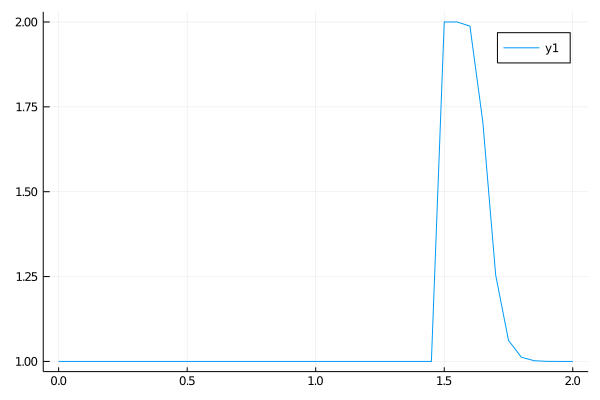

In [294]:
for n in 1:nt  #iterate through time
    uⁿ = copy(uⁿ⁺¹) ##copy the existing values of u into un
    for i in 2:nx  ##now we'll iterate through the u array
     ###This is the line from Step 1, copied exactly.  Edit it for our new equation.
     ###then uncomment it and run the cell to evaluate Step 2       
        uⁿ⁺¹[i] = uⁿ[i] - uⁿ[i] * Δt/Δx * (uⁿ[i] - uⁿ[i-1])
    end
end

u = uⁿ⁺¹
plot(x, u) ##Plot the results

What do you observe about the evolution of the hat function under the nonlinear convection equation? What happens when you change the numerical parameters and run again?

## Learn More

For a careful walk-through of the discretization of the convection equation with finite differences (and all steps from 1 to 4), watch **Video Lesson [4](https://youtube.com/watch?v=y2WaK7_iMRI)** by Prof. Barba on YouTube.